In [16]:
import pandas as pd
import numpy as np
TFI = pd.read_csv("transfer.csv")
TFI.head()

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,39423,105124,13,A03,565,20190920,17:26,2990,1
1,21279,104907,1,A03,565,20190920,10:27,2990,1
2,48969,104882,5,A03,572,20190920,10:05,7490,1
3,30533,103245,5,A03,670,20190920,14:36,49800,1
4,64346,104317,1,A03,543,20190920,22:34,26900,1


In [8]:
tfi3 = TFI[["clnt_id","pd_c","de_dt","buy_am","buy_ct"]]
tfi3['de_dt'] = pd.to_datetime(tfi3['de_dt'], format='%Y%m%d')
month_group = tfi3.groupby('clnt_id')['de_dt']
tfi3['MonthStarted'] = month_group.transform(np.min)
tfi3['MonthStarted'] = tfi3['MonthStarted'].dt.week
tfi3.head()

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,clnt_id,pd_c,de_dt,buy_am,buy_ct,MonthStarted
0,39423,565,2019-09-20,2990,1,27
1,21279,565,2019-09-20,2990,1,27
2,48969,572,2019-09-20,7490,1,28
3,30533,670,2019-09-20,49800,1,36
4,64346,543,2019-09-20,26900,1,27


In [9]:
tfi3["Month_Pass"] = tfi3['de_dt'].dt.week - tfi3['MonthStarted']

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
from datetime import date, timedelta, datetime

def get_unique(x):
    return len(x.drop_duplicates())

cohort_group = tfi3.groupby(['MonthStarted', 'Month_Pass'])
cohort_df = cohort_group['clnt_id'].apply(get_unique).reset_index()

def weekBoundary(week):
    startOfYear = date(2019, 1, 1)
    now = startOfYear + timedelta(weeks=int(week-1))
    week0 = now - timedelta(days=now.isoweekday()%7)
    sun = week0.strftime("%Y%m%d")
    sat = (week0 + timedelta(days=6)).strftime("%Y%m%d")
    return sun + " ~ " + sat

for i in range(cohort_df.shape[0]):
    cohort_df['MonthStarted'][i] = weekBoundary(cohort_df['MonthStarted'][i])
cohort_df.head()

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,MonthStarted,Month_Pass,clnt_id
0,20190630 ~ 20190706,0,4876
1,20190630 ~ 20190706,1,2834
2,20190630 ~ 20190706,2,2957
3,20190630 ~ 20190706,3,2708
4,20190630 ~ 20190706,4,2847


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
cohort_df = cohort_df.pivot(index='MonthStarted', columns='Month_Pass')
customer_cohort = cohort_df.div(cohort_df.iloc[:, 0], axis=0) * 100
customer_cohort = customer_cohort.round(decimals=2)
customer_cohort

clnt_id                                                   \
Month_Pass               0      1      2      3      4      5      6      7    
MonthStarted                                                                   
20190630 ~ 20190706   100.0  58.12  60.64  55.54  58.39  55.89  56.05  54.84   
20190707 ~ 20190713   100.0  42.44  37.64  40.51  39.05  37.70  36.39  38.48   
20190714 ~ 20190720   100.0  27.85  32.27  31.66  31.75  28.98  32.09  30.71   
20190721 ~ 20190727   100.0  29.31  24.14  21.41  25.14  25.14  27.73  21.12   
20190728 ~ 20190803   100.0  23.87  23.21  22.54  22.54  26.21  21.37  22.20   
20190804 ~ 20190810   100.0  21.82  21.82  20.14  20.62  19.18  18.94  14.87   
20190811 ~ 20190817   100.0  20.32  23.22  20.32  17.15  17.15  12.14   2.11   
20190818 ~ 20190824   100.0  19.86  18.77  18.41  20.94  14.80   2.17    NaN   
20190825 ~ 20190831   100.0  24.37  22.22  18.64  11.83   1.79    NaN    NaN   
20190901 ~ 20190907   100.0  11.16  15.29  10.33   0.83    NaN    NaN    NaN   
20190908 ~ 20190914   100.0  17.73  10.64   1.42    NaN    NaN    NaN    NaN   
20190915 ~ 20190921   100.0  11.11   0.51    NaN    NaN    NaN    NaN    NaN   
20190922 ~ 20190928   100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
20190929 ~ 20191005   100.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                               
Month_Pass              8      9      10     11     12     13  
MonthStarted                                                   
20190630 ~ 20190706  56.36  56.64  51.58  55.46  51.13  13.45  
20190707 ~ 20190713  38.84  35.35  39.05  33.47   6.78    NaN  
20190714 ~ 20190720  26.64  30.54  25.26   4.58    NaN    NaN  
20190721 ~ 20190727  22.84  19.68   3.02    NaN    NaN    NaN  
20190728 ~ 20190803  16.36   3.84    NaN    NaN    NaN    NaN  
20190804 ~ 20190810   2.16    NaN    NaN    NaN    NaN    NaN  
20190811 ~ 20190817    NaN    NaN    NaN    NaN    NaN    NaN  
20190818 ~ 20190824    NaN    NaN    NaN    NaN    NaN    NaN  
20190825 ~ 20190831    NaN    NaN    NaN    NaN    NaN    NaN  
20190901 ~ 20190907    NaN    NaN    NaN    NaN    NaN    NaN  
20190908 ~ 20190914    NaN    NaN    NaN    NaN    NaN    NaN  
20190915 ~ 20190921    NaN    NaN    NaN    NaN    NaN    NaN  
20190922 ~ 20190928    NaN    NaN    NaN    NaN    NaN    NaN  
20190929 ~ 20191005    NaN    NaN    NaN    NaN    NaN    NaN

<IPython.core.display.Javascript object>


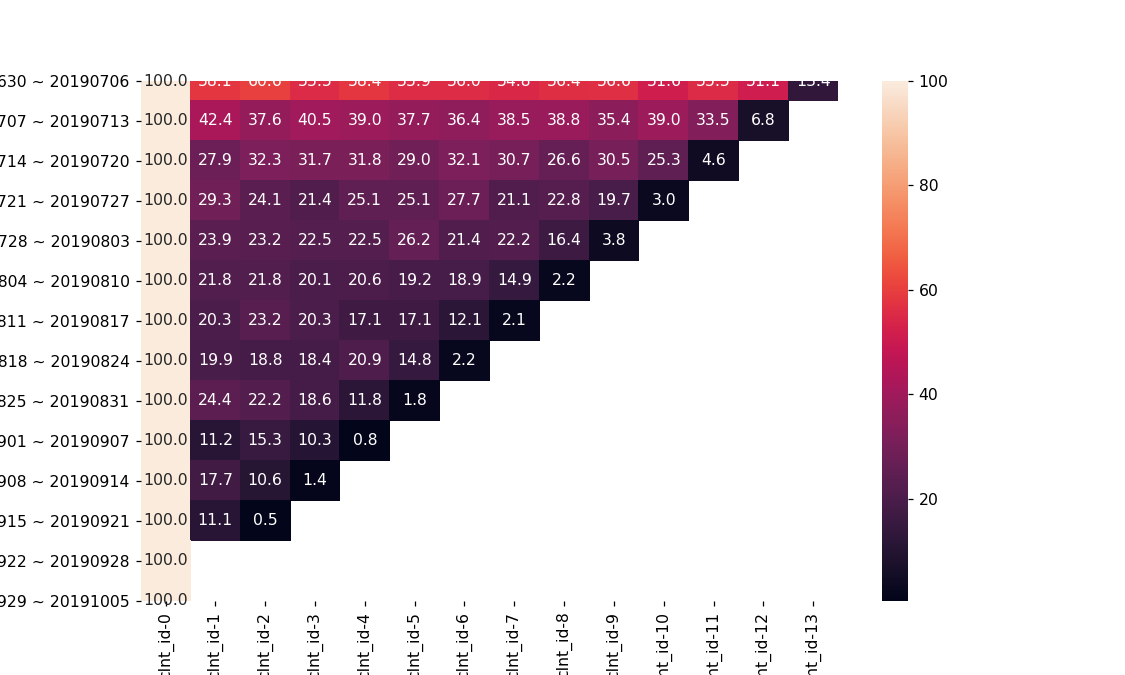

In [14]:
xticks = np.arange(0, 14)
yticks = np.arange(0, 15)
plt.figure(figsize = (10, 6))
sns.heatmap(customer_cohort, 
            annot=True, 
            
            fmt='.1f')


In [15]:
OAI = pd.read_csv("Online.csv")

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
from tqdm import tqdm
tfi2 = TFI[["de_tm","pd_c"]]
tfi2['hour'] = (pd.to_datetime(tfi2['de_tm'])).dt.strftime("%H")
time_pd_c = {}
for i in tqdm(range(len(tfi2))):
    data = tfi2.iloc[i,:]
    time_pd_c[data["hour"]] = time_pd_c.get(data["hour"], [])
    time_pd_c[data["hour"]].append(data["pd_c"])

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 573867/573867 [01:54<00:00, 5022.71it/s]


In [30]:
np.save("time_pd_c.npy",sdict)

In [29]:
sdict= sorted(time_pd_c.items())
sdict

[('00',
  [1573,
   1578,
   1604,
   1610,
   1600,
   964,
   354,
   354,
   350,
   1215,
   1625,
   348,
   352,
   355,
   350,
   194,
   1062,
   356,
   198,
   183,
   1393,
   107,
   113,
   98,
   104,
   1628,
   114,
   518,
   1398,
   1404,
   1401,
   1578,
   1587,
   1583,
   964,
   191,
   186,
   1245,
   107,
   1395,
   1393,
   1393,
   1194,
   365,
   546,
   546,
   1604,
   1610,
   1617,
   1617,
   1616,
   354,
   925,
   348,
   355,
   355,
   197,
   188,
   572,
   190,
   516,
   1398,
   108,
   182,
   1608,
   1252,
   1245,
   1393,
   1213,
   1213,
   1383,
   518,
   516,
   516,
   964,
   1613,
   1616,
   1189,
   1048,
   1608,
   933,
   352,
   354,
   1383,
   374,
   1062,
   180,
   515,
   182,
   516,
   175,
   178,
   1385,
   706,
   706,
   706,
   534,
   572,
   565,
   565,
   1583,
   1583,
   1608,
   1617,
   670,
   1625,
   964,
   964,
   952,
   347,
   191,
   107,
   1617,
   171,
   350,
   1566,
   1616,
   1600